In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#dataset = pd.read_csv('Master_File_Housing_Data_LogisticReg.csv')
dataset = pd.read_csv('Master_File_Housing_Data.csv')

df= dataset.dropna(how='any', subset=['CONSTRUCTIONTYPE'])
df['BELOWGROUNDAREA'].fillna(0,inplace=True)

X = df.iloc[:,2:-2].values
y = df.iloc[:,13].values

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean') 
imputer.fit(X[:,[1,3,5,6,7,8,10]])
X[:,[1,3,5,6,7,8,10]]= imputer.transform(X[:,[1,3,5,6,7,8,10]])

#print(X[0])
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 9] = labelencoder.fit_transform(X[:, 9])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,9])
data = onehotencoder.fit_transform(X).toarray()
#print(data[0])
NewData = data[:,[0,1,2,3,4,5,6,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25]]

X_sig = NewData[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,22,23]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.


In [3]:
#Fitting Multiple Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
mlrObj = LinearRegression()
mlrObj.fit(X_train,y_train)

#Predicting on the Test Set
y_pred = mlrObj.predict(X_test)

print('MultipleRegression: ', mlrObj.score(X_test,y_test))

MultipleRegression:  0.8355390116130667


### Compare actual sale price vs predicted sale price.

In [4]:
np.set_printoptions(suppress=True)

this = df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Actual,Predicted
0,259580,252548
1,209100,218447
2,165000,185902
3,187000,150646
4,725000,610900
...,...,...
1701,260000,224992
1702,200750,203376
1703,1.83e+06,1.81337e+06
1704,345300,398511


In [5]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=2)
X_trainPCA = pcaObj.fit_transform(X_train)
X_testPCA = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
pmlrObj_sig = LinearRegression()
pmlrObj_sig.fit(X_trainPCA, y_train)

y_sig_pred = pmlrObj_sig.predict(X_testPCA)

print('PCA 2 components =', pmlrObj_sig.score(X_testPCA,y_test))

#Applying PCA - 1 component
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=1)
X_trainPCA = pcaObj.fit_transform(X_train)
X_testPCA = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
pmlrObj_sig = LinearRegression()
pmlrObj_sig.fit(X_trainPCA, y_train)

y_sig_pred = pmlrObj_sig.predict(X_testPCA)

print('PCA 1 components =', pmlrObj_sig.score(X_testPCA,y_test))

#Applying PCA - None components
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)
X_trainPCA = pcaObj.fit_transform(X_train)
X_testPCA = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
pmlrObj_sig = LinearRegression()
pmlrObj_sig.fit(X_trainPCA, y_train)

y_sig_pred = pmlrObj_sig.predict(X_testPCA)

print('PCA None components =', pmlrObj_sig.score(X_testPCA,y_test))

PCA 2 components = 0.6982314207547364
PCA 1 components = 0.360148245444772
PCA None components = 0.8355390116130667


In [6]:
#kernel PCA 
from sklearn.decomposition import KernelPCA 
kernelPCAObj = KernelPCA(n_components=2, kernel='rbf') 
X_trainKPCA = kernelPCAObj.fit_transform(X_train) 
X_testKPCA = kernelPCAObj.transform(X_test)

#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
pmlrObj_sig = LinearRegression()
pmlrObj_sig.fit(X_trainKPCA, y_train)

y_sig_pred_kpca = pmlrObj_sig.predict(X_testKPCA)

print('K-PCA 2 components =', pmlrObj_sig.score(X_testKPCA,y_test))

#kernel PCA 
from sklearn.decomposition import KernelPCA 
kernelPCAObj = KernelPCA(n_components=1, kernel='rbf') 
X_trainKPCA = kernelPCAObj.fit_transform(X_train) 
X_testKPCA = kernelPCAObj.transform(X_test)

#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
pmlrObj_sig = LinearRegression()
pmlrObj_sig.fit(X_trainKPCA, y_train)

y_sig_pred_kpca = pmlrObj_sig.predict(X_testKPCA)
print('K-PCA 1 components =', pmlrObj_sig.score(X_testKPCA,y_test))

#kernel PCA 
from sklearn.decomposition import KernelPCA 
kernelPCAObj = KernelPCA(n_components=None, kernel='rbf') 
X_trainKPCA = kernelPCAObj.fit_transform(X_train) 
X_testKPCA = kernelPCAObj.transform(X_test)

#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
pmlrObj_sig = LinearRegression()
pmlrObj_sig.fit(X_trainKPCA, y_train)

y_sig_pred_kpca = pmlrObj_sig.predict(X_testKPCA)
print('K-PCA None components =', pmlrObj_sig.score(X_testKPCA,y_test))

K-PCA 2 components = 0.23239410122622062
K-PCA 1 components = 0.19516286587304799
K-PCA None components = -1606415950.3145885


In [32]:
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor()
grid_param = {  
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110],
    'max_depth': [2, 3 ,4, 5, 10, 15, 20],
    'bootstrap': [True, False]
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=regObj, param_grid=grid_param, n_jobs=-1)
gd_sr.fit(X_train, y_train) 
print(gd_sr.best_params_)  
print('Random Forest Regressor: ', gd_sr.score(X_test, y_test))

C:\Users\jas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bootstrap': True, 'max_depth': 5, 'n_estimators': 30}
Random Forest Regressor:  0.8266118355576431


n_estimators =  1
Model Accuracy =  0.7596333258082739
n_estimators =  2
Model Accuracy =  0.828257903395721
n_estimators =  3
Model Accuracy =  0.8341478919731569
n_estimators =  4
Model Accuracy =  0.8245393657174941
n_estimators =  5
Model Accuracy =  0.8344315647296674
n_estimators =  6
Model Accuracy =  0.8182305465814971
n_estimators =  7
Model Accuracy =  0.8307843154135405
n_estimators =  8
Model Accuracy =  0.8279442342426953
n_estimators =  9
Model Accuracy =  0.8260209476674291
n_estimators =  10
Model Accuracy =  0.8251857062069708
n_estimators =  11
Model Accuracy =  0.8233952775137913
n_estimators =  12
Model Accuracy =  0.8280828493708069
n_estimators =  13
Model Accuracy =  0.8173956873343795
n_estimators =  14
Model Accuracy =  0.8264599235772428
n_estimators =  15
Model Accuracy =  0.8289307174574312
n_estimators =  16
Model Accuracy =  0.823226070543917
n_estimators =  17
Model Accuracy =  0.831245106232053
Model Selection: i would go with degree value =1


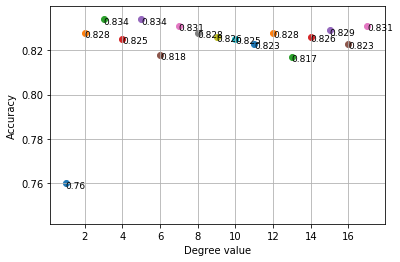

In [33]:
k = 18
i = 1

while i < k:
    regObj2 = RandomForestRegressor(n_estimators = i, max_depth=4, bootstrap=True) 
    regObj2.fit(X_train, y_train)

    #Making predictions on the Test Set 
    y_pred = regObj2.predict(X_test)
    #Print Model Accuracy 
    print('n_estimators = ',i)
    print('Model Accuracy = ', regObj2.score(X_test,y_test))

    # Visualizing the Test set results
    x=i
    y= round(regObj2.score(X_test,y_test),3)
    plt.scatter(x, y)
    plt.grid()
    plt.xlabel('Degree value')
    plt.ylabel('Accuracy')
    plt.text(x-0.002, y-0.002, y, fontsize=9)
       
    i += 1

print('Model Selection: i would go with degree value =3')

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

for degree in [0,1,2,3,4]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(X_train,y_train)
    print('Poly degree = ', degree,':', model.score(X_test, y_test))

Poly degree =  0 : -0.0005299899951991538
Poly degree =  1 : 0.8355390116130667
Poly degree =  2 : -9.888950912935312e+21
Poly degree =  3 : -1.2659447969873738e+19
Poly degree =  4 : -2036057576023.7292


In [10]:
#Polynomial Regression with Ridge 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge 
polyFeatureObj = PolynomialFeatures(degree=1) 
#X_polyRidge = polyFeatureObj.fit_transform(X_train) 
ridgeObj = Ridge() 
ridgeObj.fit(X_train, y_train)

print('Ridge: ',ridgeObj.score(X_test, y_test))

Ridge:  0.8354850949140552


In [11]:
from sklearn.linear_model import Lasso
lassoObj= Lasso()
lassoObj.fit(X_train, y_train)

print('Lasso: ',lassoObj.score(X_test, y_test))

Lasso:  0.8355412101431431


In [12]:
#Polynomial Regression with ElasticNet 
from sklearn.linear_model import ElasticNet 
enObj = ElasticNet(l1_ratio=1) 
enObj.fit(X_train, y_train)

print('ElasticNet: ',enObj.score(X_test, y_test))

ElasticNet:  0.8355412101431431


In [31]:
xtest1 = ([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1563,50094,2,1,0,265000]])
X_test2 = sc_X.transform(xtest1)
ypred1 = enObj.predict(X_test2)
print('5508 29th Ave S = ',int(ypred1), " Actual Sales Price = 330000", " Difference =",int(ypred1)-330000, "/%Dif = ",(int(ypred1)/330000)-1)

xtest1a = ([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1096,5120,1,1.2,0,269000]])
X_test2a = sc_X.transform(xtest1a)
ypred2 = enObj.predict(X_test2a)
print('5200 39th Ave S = ',int(ypred2), " Actual Sales Price = 315000", " Difference =",int(ypred2)-315000, "/%Dif = ",(int(ypred2)/315000)-1)

xtest1b = ([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2465,5935,2,1.2,1,426500]])
X_test2b = sc_X.transform(xtest1b)
ypred3 = enObj.predict(X_test2b)
print('5833 11th Ave S = ',int(ypred3), " Actual Sales Price = 430000", " Difference =",int(ypred3)-430000, "/%Dif = ",(int(ypred3)/430000)-1)

xtest1c = ([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2103,5227,2,2.5,1,611500]])
X_test2c = sc_X.transform(xtest1c)
ypred4 = enObj.predict(X_test2c)
print('3333 Irving Ave S = ',int(ypred4), " Actual Sales Price = 625000", " Difference =",int(ypred4)-625000, "/%Dif = ",(int(ypred4)/625000)-1)

5508 29th Ave S =  298388  Actual Sales Price = 330000  Difference = -31612 /%Dif =  -0.09579393939393943
5200 39th Ave S =  267522  Actual Sales Price = 315000  Difference = -47478 /%Dif =  -0.15072380952380948
5833 11th Ave S =  467916  Actual Sales Price = 430000  Difference = 37916 /%Dif =  0.0881767441860466
3333 Irving Ave S =  591674  Actual Sales Price = 625000  Difference = -33326 /%Dif =  -0.05332159999999997
